In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt
import logging


In [ ]:
logger = tf.get_logger()

logger.setLevel(logging.ERROR)

dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = [
    'Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis',
    'Siete', 'Ocho', 'Nueve'
]

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [ ]:
#Normalizar 

def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [ ]:
#Estructura de red
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,1)),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para clasificacion       
])

#Indicar las funciones a usar
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Aprendizaje por lotes de 32 c/u
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

#Realizar aprendizaje
model.fit(
  train_dataset, epochs=5,
  steps_per_epoch=math.ceil(num_train_examples/BATCHSIZE) # No será necesario pronto
)

Epoch 1/5
1875/1875 [==============================] - 13s 3ms/step - loss: 0.2695 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1231 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0933 - accuracy: 0.9713
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0723 - accuracy: 0.9773
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0578 - accuracy: 0.9819


In [ ]:
#Evaluar nuestro modelo ya entrenado, contra el dataset de pruebas
test_loss, test_accuracy = model.evaluate(
    test_dataset, steps=math.ceil(num_test_examples/32)
)

print("Resultado de las pruebas: ", test_accuracy)

for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    

    plt.xlabel("Prediccion: {}".format(class_names[predicted_label]), color=color)

313/313 [==============================] - 1s 4ms/step - loss: 0.0929 - accuracy: 0.9727
Resultado de las pruebas:  0.9726999998092651


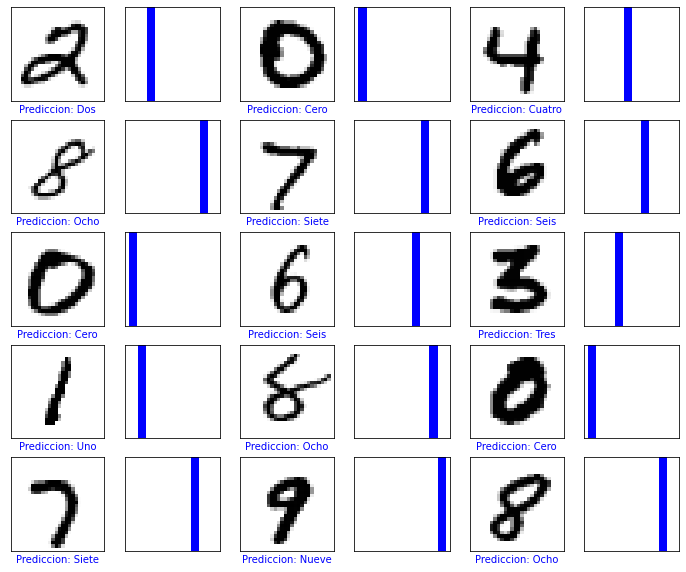

In [ ]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#888888")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


numrows = 5
numcols = 3
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
    plt.subplot(numrows, 2*numcols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(numrows, 2*numcols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

plt.show()

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.2767 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1242 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0912 - accuracy: 0.9717
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0681 - accuracy: 0.9787
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0870 - accuracy: 0.9746
Resultado en las pruebas:  0.9746000170707703


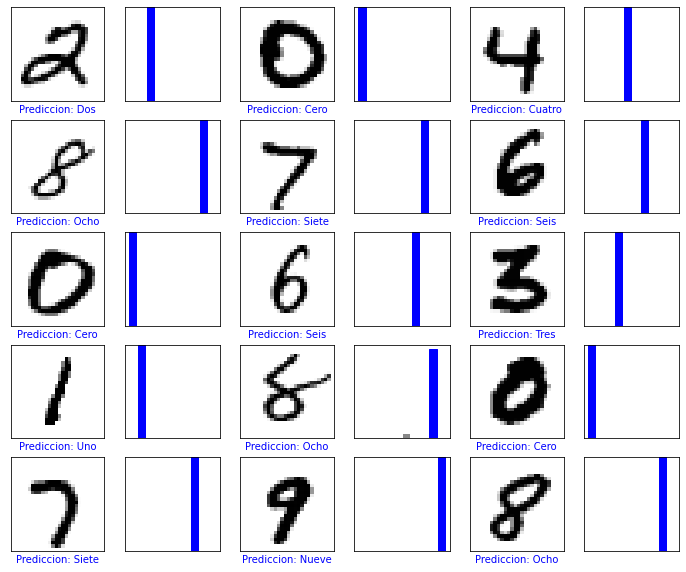

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()

logger.setLevel(logging.ERROR)


dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = [
    'Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis',
    'Siete', 'Ocho', 'Nueve'
]

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

#Normalizar: Numeros de 0 a 255, que sean de 0 a 1
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

#Estructura de la red
model = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=(28,28,1)),
	tf.keras.layers.Dense(64, activation=tf.nn.relu),
	tf.keras.layers.Dense(64, activation=tf.nn.relu),
	tf.keras.layers.Dense(10, activation=tf.nn.softmax) #para clasificacion
])

#Indicar las funciones a utilizar
model.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy']
)

#Aprendizaje por lotes de 32 cada lote
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

#Realizar el aprendizaje
model.fit(
	train_dataset, epochs=5,
	steps_per_epoch=math.ceil(num_train_examples/BATCHSIZE) #No sera necesario pronto
)

#Evaluar nuestro modelo ya entrenado, contra el dataset de pruebas
test_loss, test_accuracy = model.evaluate(
	test_dataset, steps=math.ceil(num_test_examples/32)
)

print("Resultado en las pruebas: ", test_accuracy)


for test_images, test_labels in test_dataset.take(1):
	test_images = test_images.numpy()
	test_labels = test_labels.numpy()
	predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_labels, images):
	predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img[...,0], cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("Prediccion: {}".format(class_names[predicted_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
	predictions_array, true_label = predictions_array[i], true_label[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#888888")
	plt.ylim([0,1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')

numrows=5
numcols=3
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	plt.subplot(numrows, 2*numcols, 2*i+1)
	plot_image(i, predictions, test_labels, test_images)
	plt.subplot(numrows, 2*numcols, 2*i+2)
	plot_value_array(i, predictions, test_labels)

plt.show()